In [26]:
import numpy as np
import pandas as pd
from Farm_Evaluator_Vec import *
import pyswarms as pso
import matplotlib.pyplot as plt
%matplotlib inline
import pso_simple

In [2]:
coords = pd.read_csv('submission33.csv').values
power_curve  =  loadPowerCurve('Shell_Hackathon Dataset/power_curve.csv')
n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t = preProcessing(power_curve)
wind_inst_freq =  binWindResourceData('Shell_Hackathon Dataset/Wind Data/combined_data.csv')
turb_specs = {'Name': 'Anon Name','Vendor': 'Anon Vendor','Type': 'Anon Type','Dia (m)': 100,
              'Rotor Area (m2)': 7853,'Hub Height (m)': 100,'Cut-in Wind Speed (m/s)': 3.5,'Cut-out Wind Speed (m/s)': 25,
              'Rated Wind Speed (m/s)': 15,'Rated Power (MW)': 3}
def get_aep(coords):
    AEP = getAEP(50, coords, power_curve, wind_inst_freq, 
                  n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t,0)  
    return AEP

In [ ]:
get_aep(coords)

In [43]:
def plot_turbines(coords):
    plt.figure(figsize=(10,10))
    plt.scatter(coords[:,0],coords[:,1],color='r',s=200)
    plt.show()

In [ ]:
plot_turbines(coords)

In [7]:
from itertools import combinations
combs = list(combinations(list(range(50)),2))
def get_penalty(co,gamma):
    pen = 0
    for c in combs:
        turb1 = co[c[0]]
        turb2 = co[c[1]]
        prox = np.linalg.norm(turb1 - turb2) - 400
        if prox<0:
            pen -= prox
    return gamma*pen

In [30]:
def cost_func(param_list):
    """
    flattened coords is passed as param list
    """
    aeps = []
    gamma = 0.01
    for p in param_list:
        coords = np.array(p).reshape(50,2)
        aep = -(get_aep(coords)-get_penalty(coords,gamma))
        aeps.append(aep)
    
    return aeps

In [18]:
coords = pd.read_csv('submission33.csv').values
initial = coords.flatten().tolist()
bounds = []
for i in range(100):
    bounds.append((50,3950))
pso_simple.minimize(cost_func,initial,bounds,num_particles=1000,maxiter=10,verbose=True)

iter:    0, best solution:  -1.000000
iter:    1, best solution: -530.787950
iter:    2, best solution: -530.787950
iter:    3, best solution: -530.787950
iter:    4, best solution: -530.787950
iter:    5, best solution: -530.787950
iter:    6, best solution: -530.787950
iter:    7, best solution: -530.787950
iter:    8, best solution: -530.787950
iter:    9, best solution: -530.787950

FINAL SOLUTION:
   > [3129.5584715514137, 50.000000127373994, 2669.951909204506, 3949.324045720715, 50.0, 50.0000000690884, 3545.501526343311, 50.00000000426424, 2425.7336364497532, 3354.917007211199, 3481.580375223424, 3949.8841303914787, 3949.9997193054132, 49.99999999411579, 3950.0, 501.3030441387036, 3948.389368110652, 947.3905443432272, 3949.3832302074798, 1365.6724127495308, 3950.0, 1806.402695951724, 3949.9841013546425, 2219.7023514511534, 3950.0, 2647.6135619762767, 3949.999995363905, 3060.674000209155, 3075.309233447917, 3949.550462828784, 3339.2283124083647, 3163.6996475523083, 1790.9375090376

In [57]:
def PSO_windfarm_discrete(c1,c2,w,particles,iters,grid_size,gamma,init_pos=None):
    """
    c1, c2 and w are the hyperparameters, particles is the number of particles,iters is thenumber of
    iterations, grid size is the number of discrete points in horizontal direction(square grid)
    """
    X = np.linspace(50,3950,grid_size)
    coords = []
    for x in X:
        for y in X:
            coords.append([x,y])
    coords = np.array(coords)
    dim = len(coords)
    def get_coords(x):
        locs = np.argsort(x)[-50:]
        co = coords[locs.tolist()]
        return co
    def cost_func(X):
        output = []
        for x in X:
            co = get_coords(x)
            if gamma==0:
                aep = -get_aep(co)
            else:
                aep = -(get_aep(co) - get_penalty(co,gamma))
            output.append(aep)
        return output
    lb = [0 for i in range(dim)]
    ub = [1 for i in range(dim)]
    options = {'c1': c1, 'c2': c2, 'w':w}
    optimizer = pso.single.GlobalBestPSO(particles,dim,options=options,bounds=[lb,ub],init_pos=init_pos)
    best_cost,best_pos = optimizer.optimize(cost_func,iters)
    return best_cost,best_pos,optimizer

In [61]:
best_cost1,best_pos1,optimizer1 = PSO_windfarm_discrete(2.8,1.3,0.9,300,1000,10,0)

2020-10-18 15:15:53,942 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 2.8, 'c2': 1.3, 'w': 0.9}
pyswarms.single.global_best:  36%|███▋      |365/1000, best_cost=-518


KeyboardInterrupt: 

In [60]:
def cost_func(param_list):
    """
    flattened coords is passed as param list
    """
    aeps = []
    gamma = 0.01
    for p in param_list:
        coords = np.array(p).reshape(50,2)
        aep = -(get_aep(coords)-get_penalty(coords,gamma))
        aeps.append(aep)
    return aeps
c1 = 2.8
c2 = 1.3
w = 0.9
options = {'c1': c1, 'c2': c2, 'w':w}
lb = [50 for i in range(100)]
ub = [3950 for i in range(100)]
iters = 1000
particles = 300
optimizer = pso.single.GlobalBestPSO(particles,100,options=options,bounds=[lb,ub])
best_cost,best_pos = optimizer.optimize(cost_func,iters)

2020-10-18 13:41:18,112 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 2.8, 'c2': 1.3, 'w': 0.9}
pyswarms.single.global_best:  27%|██▋       |267/1000, best_cost=-479


KeyboardInterrupt: 

In [51]:
X = np.linspace(50,3950,20)
coords = []
for x in X:
    for y in X:
        coords.append([x,y])
coords = np.array(coords)
def get_coords(x):
    locs = np.argsort(x)[-50:]
    co = coords[locs.tolist()]
    return co
co = get_coords(best_pos)

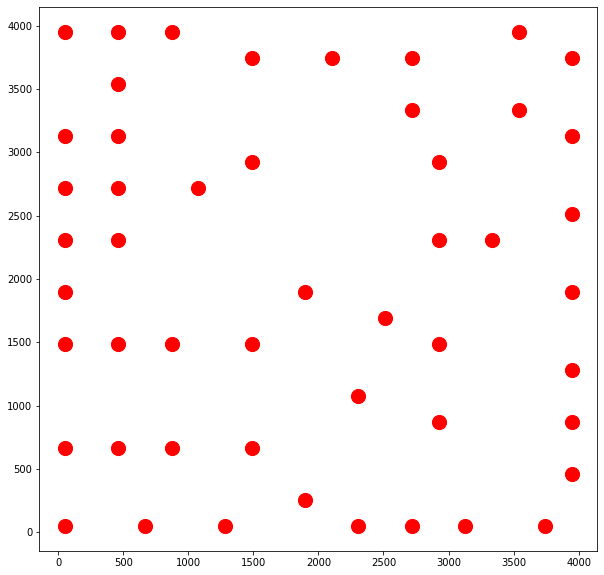

In [52]:
plot_turbines(co)

In [53]:
optimizer.pos_history[0].shape

(300, 400)